# GONZAG cloud example

In [1]:
import sys
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
from gonzag.config import *
from gonzag.io import *
from gonzag.utils import *
from gonzag.mod2sat import *
from gonzag.bilin_mapping import *
from gonzag.spectralysis import *


## Data

In [3]:
import xarray as xr
osn_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/swot_adac/eNATL60_surface_region_1'
dsmod = xr.open_zarr(osn_url, consolidated=True)

In [4]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates:
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables:
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosstsst       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [5]:
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
l_griddist = False

In [6]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat["al"].to_dask()

In [7]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185024 ... 2...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    creator_name:              CMEMS - Sea Level Thematic Assembly Center
    creator_url:               http://marine.copernicus.eu
    history:                   2019-02-20T19:39:52Z: Creation
    institution:               CLS, CNES
    keywords:                  Oceans > Ocean Topography > Sea Surface Height
    keywords_vocabulary:       NetCDF COARDS Climate and Forecast Standard Names
    license:                   http://marine.copernicus.eu/web/27-service-com...
    platform:                  Altika
    processing_level:          L3
    product_version:           2019
    project:                   COPERNICUS MARINE ENVIRONMENT MONITORING SERVI...
    references:                http://marine.copernicus.eu
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [8]:
name_ssh_sat='sla_unfiltered'

## Time overlap between model and satellite ?
Assume that model is less than 1 year, satellite has at least one whole year, we take the overlapping period without considering which year is this

In [9]:
    (date1,date2), (Nts,Ntm) = GetTimeOverlap( dssat , dsmod )
    print(' *** Time overlap between model and satellite in UNIX epoch time: it1, it2',date1,'--',date2)


 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time"
   => first and last date:  2013-03-14T05:44:50.445185024 -- 2015-03-31T22:41:36.909480960
 *** [GetTimeInfo()] Getting calendar/time info in dataset ...
   => time/record dimension is "time_counter"
   => first and last date:  2010-02-01T00:30:00.000000000 -- 2010-04-30T23:30:00.000000000

 *** Earliest/latest dates:
   => for satellite data: 2013-03-14T05:44:50.445185024 2015-03-31T22:41:36.909480960 
   => for model     data: 2010-02-01T00:30:00.000000000 2010-04-30T23:30:00.000000000 

 *** Time overlap between model and satellite in UNIX epoch time: it1, it2 2014-02-01 -- 2014-04-30


## Create object `ModelGrid` containing all the model (aka _source_) 2D+T domain grid info

In [10]:
  
    ModelGrid = ModGrid( dsmod, date1 , date2 , dsmod, name_lsm_mod, distorded_grid=False )


 *** [GetModelCoor()] Read model latitude (variable is "lat", with 2 dimensions! (763, 611) 

 *** [GetModelCoor()] Read model longitude (variable is "lon", with 2 dimensions! (763, 611) 


 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** [GridResolution()] Based on the longitude array, the model resolution ~=  0.016657295  degrees 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.99 292.17
     * lat_min, lat_max =  30.01 40.01
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2136
       =

In [11]:
SatelliteTrack = SatTrack( dssat, date1, date2, Np=Nts, \
                              domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...
 *** [GetSatCoor()] reading "latitude" in dataset ...
   => 4150072 records read...

 *** [GetSatCoor()] reading "longitude" in dataset ...
   => 4150072 records read...


 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10236
       ==> time record indices: 14883510 to 19033581, included



In [12]:
MG= ModelGrid
ST= SatelliteTrack

In [13]:
ST.time

<xarray.DataArray 'time' (time: 10236)>
array(['2014-02-02T23:14:13.207443968', '2014-02-02T23:14:14.187443968',
       '2014-02-02T23:14:15.167443968', ..., '2014-04-29T23:14:02.891097088',
       '2014-04-29T23:14:03.871097088', '2014-04-29T23:14:04.851097088'],
      dtype='datetime64[ns]')
Coordinates:
    latitude   (time) float64 dask.array<chunksize=(10236,), meta=np.ndarray>
    longitude  (time) float64 dask.array<chunksize=(10236,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2014-02-02T23:14:13.207443968 ... 2014-0...
Attributes:
    axis:           T
    long_name:      Time of measurement
    standard_name:  time

In [14]:
MG.time

<xarray.DataArray 'time_counter' (time_counter: 2136)>
array(['2010-02-01T00:30:00.000000000', '2010-02-01T01:30:00.000000000',
       '2010-02-01T02:30:00.000000000', ..., '2010-04-30T21:30:00.000000000',
       '2010-04-30T22:30:00.000000000', '2010-04-30T23:30:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Attributes:
    axis:           T
    bounds:         time_counter_bounds
    long_name:      Time axis
    standard_name:  time
    time_origin:    1900-01-01 00:00:00

In [17]:
ST.lat.shape

(10236,)

In [24]:
np.min(MG.lat.values)

30.010681

In [19]:
import xarray as xr
import numpy as np
import glob
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy
cartopy.config['pre_existing_data_dir']  = '/home/ad/alberta/git/cartopy_data' 
import matplotlib
matplotlib.rcParams.update({'font.size': 22})


In [25]:
latminM=np.min(MG.lat.values)
latmaxM=np.max(MG.lat.values)
lonminM=np.min(MG.lon.values)
lonmaxM=np.max(MG.lon.values)

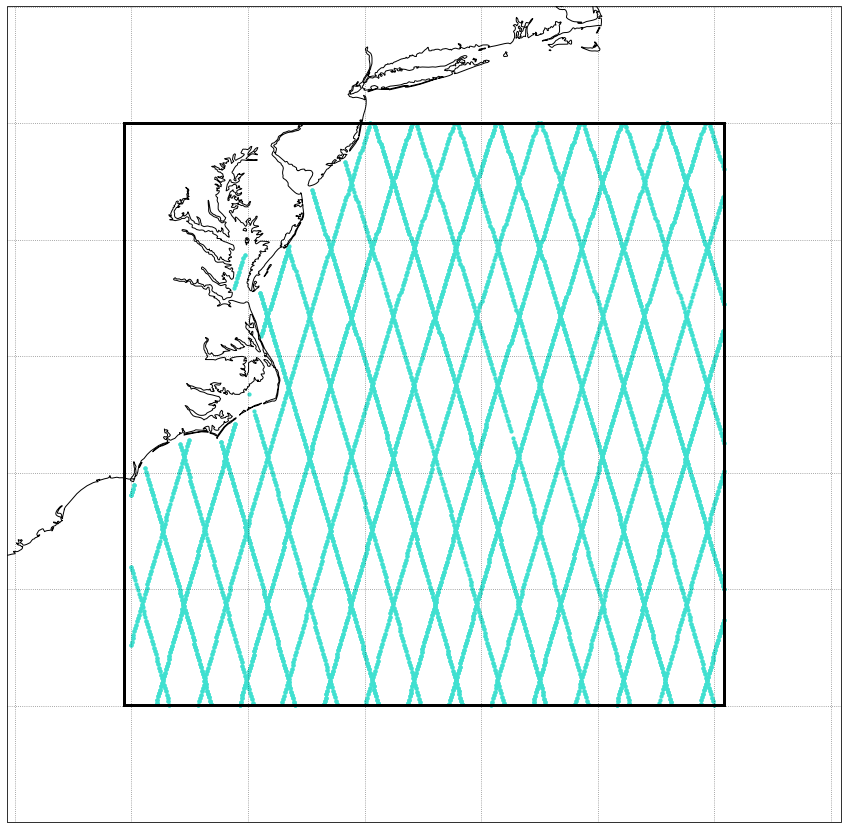

In [27]:
fig=plt.figure(figsize=(20,15))
ax = plt.subplot(111,projection=ccrs.PlateCarree(central_longitude=0))
ax.set_extent((lonminM-2, lonmaxM+2, latminM-2, latmaxM+2))
ax.coastlines(resolution="10m")
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

ax.plot([lonminM, lonminM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonmaxM, lonmaxM], [latminM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latminM, latminM],color='black',linewidth=3,transform=ccrs.PlateCarree())
ax.plot([lonminM, lonmaxM], [latmaxM, latmaxM],color='black',linewidth=3,transform=ccrs.PlateCarree())    

plt.scatter(ST.lon,ST.lat, c='turquoise',
            label='altika tracks', linewidth=0, s=18,
            transform=ccrs.PlateCarree(),zorder=1);
plt.savefig('alitka_tracks.png')